In [1]:
import h5py

f = h5py.File('train/file_brain_AXFLAIR_201_6002902.h5', 'r')
list(f.keys())



['ismrmrd_header', 'kspace', 'reconstruction_rss']

In [2]:
print(f['kspace'].shape)
# slice, coil, h, w

(14, 20, 640, 320)


In [3]:
import numpy as np
kdata = f['kspace']
kspace = np.transpose(kdata, (3,2,0,1)) 
kspace.shape

(320, 640, 14, 20)

In [4]:
from espirit import espirit, espirit_proj, ifft

import matplotlib.pyplot as plt
import numpy as np
import h5py
# Load data
f = h5py.File('train/file_brain_AXFLAIR_201_6002902.h5', 'r')
#X = f['kspace'][:1,:,:,:]  # slice(z), coils/channels, h (y), w (x)  ###! Just loading one slice
X = f['kspace'][:6,:,:,:]  # slice(z), coils/channels, h (y), w (x)  
# Expected dimensions from E-SPIRiT are (sx, sy, sz, nc)
#X = np.transpose(X, (3,2,0,1)) # We need the following sequence : 3 , 2 , 0 , 1
X = np.transpose(X, (0,2,3,1))  # They asked like  specified in the previous line, but instead use it like this in the example...

x = ifft(X, (0,1,2))

In [5]:
### TODO:  Create a routine to go through all slices and all files


In [5]:
print(X.shape)
print(x.shape)

(6, 640, 320, 20)
(6, 640, 320, 20)


In [6]:
# Derive ESPIRiT operator
esp = espirit(X, 6, 12, 0.01, 0.9925) 
# Do 
ip, proj, null = espirit_proj(x, esp)


In [8]:
print(esp.shape)
print(x.shape)
print(ip.shape, proj.shape, null.shape)

(6, 640, 320, 20, 20)
(6, 640, 320, 20)
(6, 640, 320, 20) (6, 640, 320, 20) (6, 640, 320, 20)


In [13]:
# from ipywidgets import interact, fixed
# def showslices(esp, ft):
#   @interact
#   def _showslices(x=(0,len(esp)-1)):
#     #fixed(data.shape[1:])
#     plt.figure(figsize=(12,5))
#     plt.subplot(1,3,1); plt.imshow(esp[x], cmap = 'gray'); plt.title(f'CSM slice{x}')
#     plt.subplot(1,3,2); plt.imshow(ft[x], cmap="gray"); plt.title(f'fft slice {x}')

Close figures to continue execution...


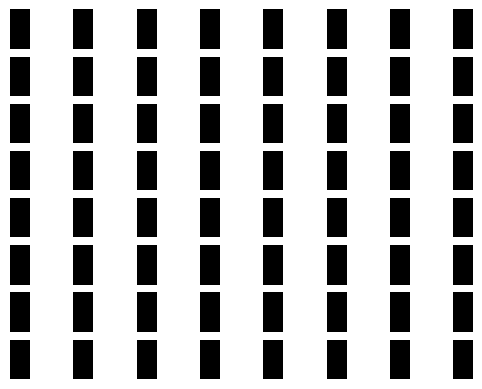

NOTE: Contrast has been changed


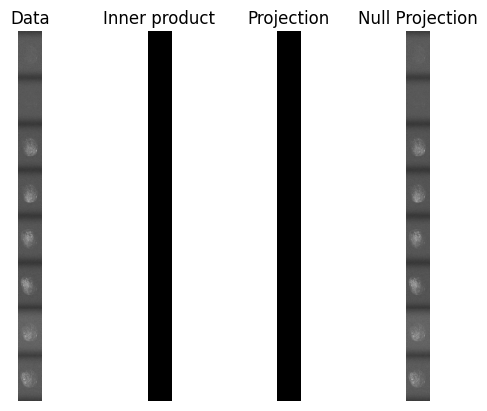

In [15]:
# Figure code
print("Close figures to continue execution...")
slice = 5

# Display ESPIRiT operator
for idx in range(8):
    for jdx in range(8):
        plt.subplot(8, 8, (idx * 8 + jdx) + 1)
        plt.imshow(np.abs(esp[slice,:,:,idx,jdx]), cmap='gray')
        plt.axis('off')
plt.show()

dspx = np.power(np.abs(np.concatenate((x[slice,:, :, 0], x[slice,:, :, 1], x[slice,:, :, 2], x[slice,:, :, 3], x[slice,:, :, 4], x[slice,:, :, 5], x[slice,:, :, 6], x[slice,:, :, 7]), 0)), 1/3)
dspip = np.power(np.abs(np.concatenate((ip[slice,:, :, 0], ip[slice,:, :, 1], ip[slice,:, :, 2], ip[slice,:, :, 3], ip[slice,:, :, 4], ip[slice,:, :, 5], ip[slice,:, :, 6], ip[slice,:, :, 7]), 0)), 1/3)
dspproj = np.power(np.abs(np.concatenate((proj[slice,:, :, 0], proj[slice,:, :, 1], proj[slice,:, :, 2], proj[slice,:, :, 3], proj[slice,:, :, 4], proj[slice,:, :, 5], proj[slice,:, :, 6], proj[slice,:, :, 7]), 0)), 1/3)
dspnull = np.power(np.abs(np.concatenate((null[slice,:, :, 0], null[slice,:, :, 1], null[slice,:, :, 2], null[slice,:, :, 3], null[slice,:, :, 4], null[slice,:, :, 5], null[slice,:, :, 6], null[slice,:, :, 7]), 0)), 1/3)

print("NOTE: Contrast has been changed")

# Display ESPIRiT projection results 
plt.subplot(1, 4, 1)
plt.imshow(dspx, cmap='gray')
plt.title('Data')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(dspip, cmap='gray')
plt.title('Inner product')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(dspproj, cmap='gray')
plt.title('Projection')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(dspnull, cmap='gray')
plt.title('Null Projection')
plt.axis('off')
plt.show()

(6, 640, 320, 20, 20)
Close figures to continue execution...


TypeError: Invalid shape (6, 640, 20) for image data

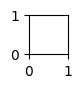

In [9]:
# # Figure code
# esp  = np.squeeze(esp)
# print(esp.shape)
# x    = np.squeeze(x)
# ip   = np.squeeze(ip)
# proj = np.squeeze(proj)
# null = np.squeeze(null)

# print("Close figures to continue execution...")

# # Display ESPIRiT operator
# for idx in range(8):
#     for jdx in range(8):
#         plt.subplot(8, 8, (idx * 8 + jdx) + 1)
#         plt.imshow(np.abs(esp[:,:,idx,jdx]), cmap='gray')
#         plt.axis('off')
# plt.show()

# dspx = np.power(np.abs(np.concatenate((x[:, :, 0], x[:, :, 1], x[:, :, 2], x[:, :, 3], x[:, :, 4], x[:, :, 5], x[:, :, 6], x[:, :, 7]), 0)), 1/3)
# dspip = np.power(np.abs(np.concatenate((ip[:, :, 0], ip[:, :, 1], ip[:, :, 2], ip[:, :, 3], ip[:, :, 4], ip[:, :, 5], ip[:, :, 6], ip[:, :, 7]), 0)), 1/3)
# dspproj = np.power(np.abs(np.concatenate((proj[:, :, 0], proj[:, :, 1], proj[:, :, 2], proj[:, :, 3], proj[:, :, 4], proj[:, :, 5], proj[:, :, 6], proj[:, :, 7]), 0)), 1/3)
# dspnull = np.power(np.abs(np.concatenate((null[:, :, 0], null[:, :, 1], null[:, :, 2], null[:, :, 3], null[:, :, 4], null[:, :, 5], null[:, :, 6], null[:, :, 7]), 0)), 1/3)

# print("NOTE: Contrast has been changed")

# # Display ESPIRiT projection results 
# plt.subplot(1, 4, 1)
# plt.imshow(dspx, cmap='gray')
# plt.title('Data')
# plt.axis('off')
# plt.subplot(1, 4, 2)
# plt.imshow(dspip, cmap='gray')
# plt.title('Inner product')
# plt.axis('off')
# plt.subplot(1, 4, 3)
# plt.imshow(dspproj, cmap='gray')
# plt.title('Projection')
# plt.axis('off')
# plt.subplot(1, 4, 4)
# plt.imshow(dspnull, cmap='gray')
# plt.title('Null Projection')
# plt.axis('off')
# plt.show()